In [34]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt





In [35]:
# Define the path to the dataset
dataset_path = "C:/Users/ss938719/Documents/PlantVillage/"

# Read the images and labels from the dataset
images = []
labels = []

for subdir in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, subdir)):
        for file in os.listdir(os.path.join(dataset_path, subdir)):
            if file.endswith(".JPG"):
                image_path = os.path.join(dataset_path, subdir, file)
                images.append(image_path)
                labels.append(subdir)



In [36]:
print("Number of images: ", len(images))
print("Number of labels: ", len(labels))

Number of images:  20482
Number of labels:  20482


In [37]:
subdirs = os.listdir(dataset_path)
for subdir in subdirs:
    subdir_path = os.path.join(dataset_path, subdir)
    # Count the number of files in the subdirectory
    num_images = len(os.listdir(subdir_path))
    # Print the class name and number of images
    print(subdir + ":", num_images)

Pepper__bell___Bacterial_spot: 997
Pepper__bell___healthy: 1478
Potato___Early_blight: 1000
Potato___healthy: 152
Potato___Late_blight: 1000
Tomato_Bacterial_spot: 2127
Tomato_Early_blight: 1000
Tomato_healthy: 1591
Tomato_Late_blight: 1909
Tomato_Leaf_Mold: 952
Tomato_Septoria_leaf_spot: 1771
Tomato_Spider_mites_Two_spotted_spider_mite: 1676
Tomato__Target_Spot: 1404
Tomato__Tomato_mosaic_virus: 373
Tomato__Tomato_YellowLeaf__Curl_Virus: 3209


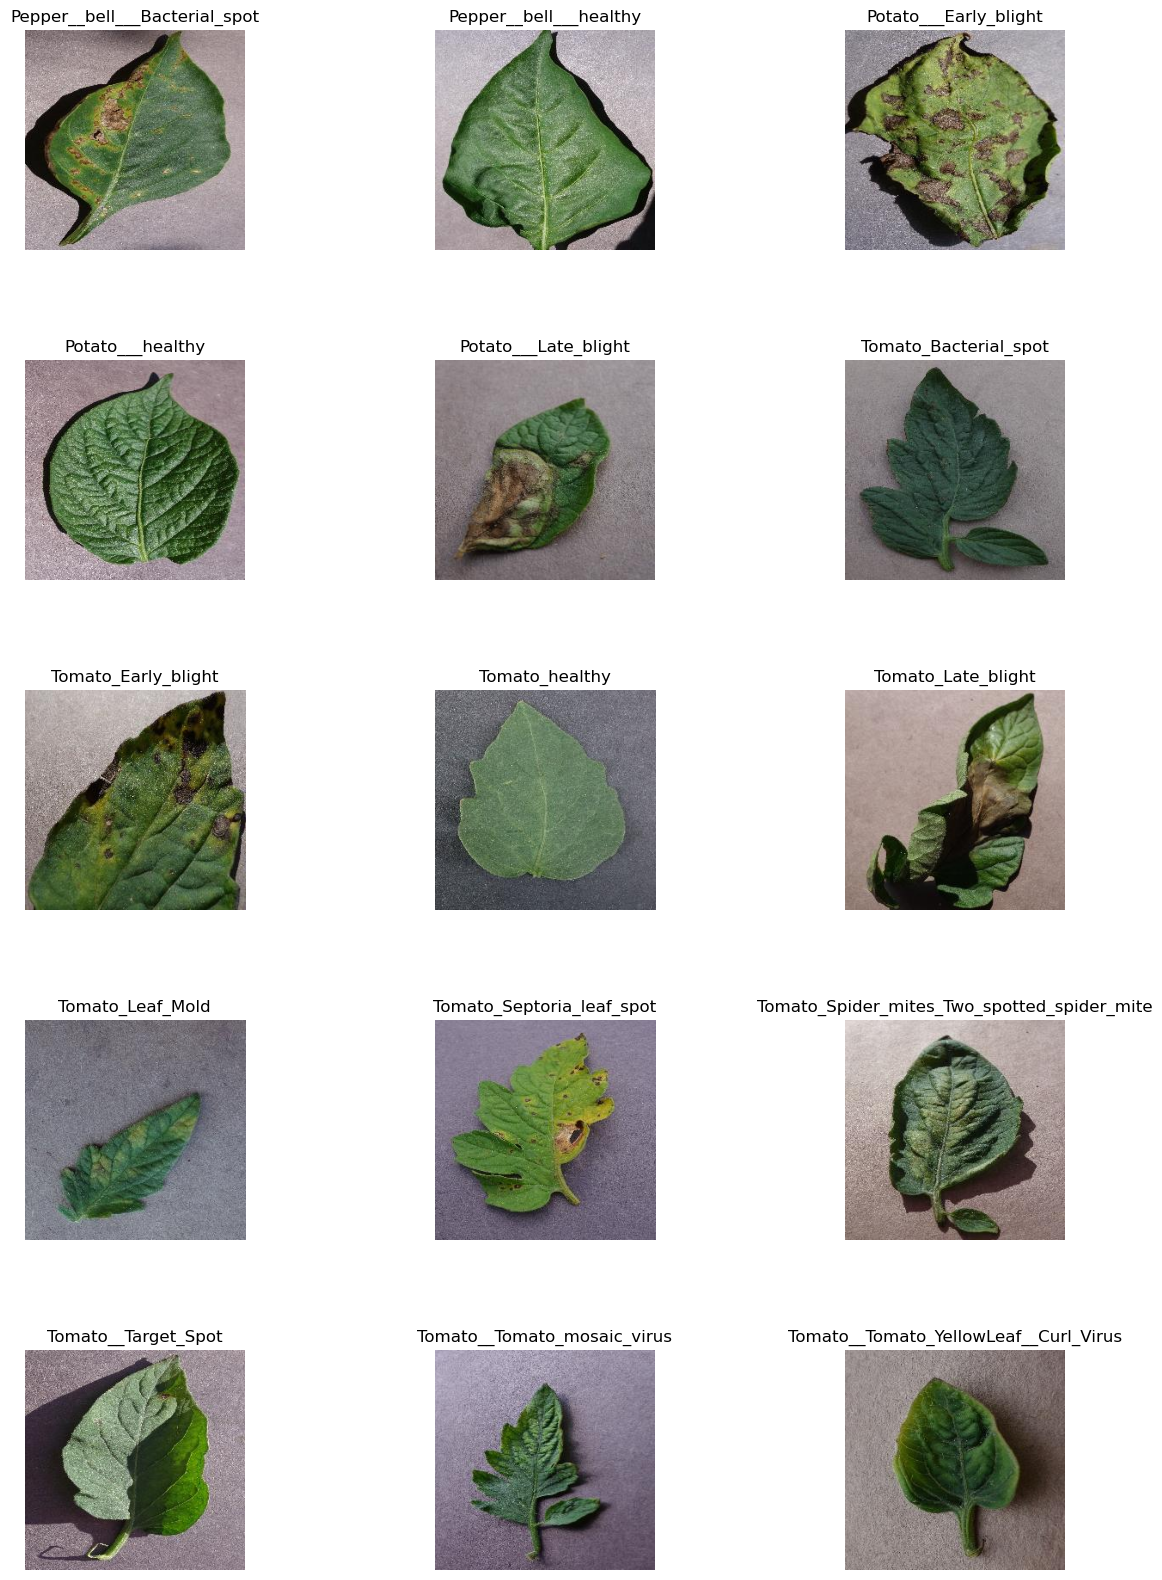

In [38]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate over the subdirectories and display the first image in each
for i, subdir in enumerate(subdirs):
    row = i // 3
    col = i % 3
    subdir_path = os.path.join(dataset_path, subdir)
    img_file = os.listdir(subdir_path)[0]
    img_path = os.path.join(subdir_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[row, col].imshow(img)
    axs[row, col].set_title(subdir)
    axs[row, col].axis('off')

# Display the figure
plt.show()

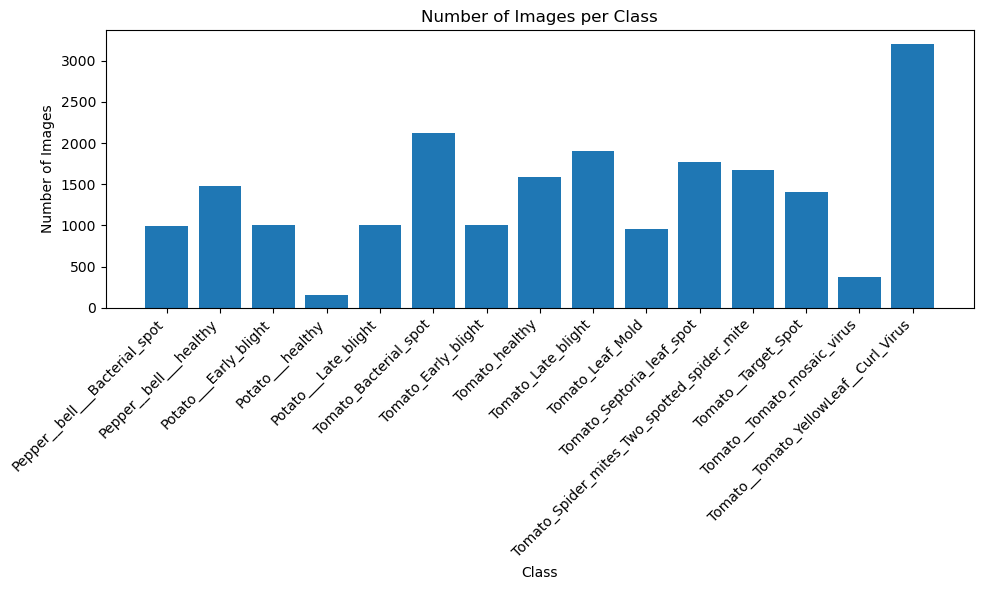

In [39]:
class_names = []
num_images = []

for subdir in subdirs:
    subdir_path = os.path.join(dataset_path, subdir)
    # Count the number of files in the subdirectory
    class_names.append(subdir)
    num_images.append(len(os.listdir(subdir_path)))

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, num_images)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [40]:
# Convert labels to one-hot encoded vectors
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)



In [41]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)



In [42]:
# Preprocess the images
def preprocess_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image.astype("float32") / 255.0
    return image

# Set the target size for resizing the images
target_size = (224, 224)

# Preprocess the training images
train_images_preprocessed = []

for image_path in train_images:
    preprocessed_image = preprocess_image(image_path, target_size)
    train_images_preprocessed.append(preprocessed_image)

# Preprocess the testing images
test_images_preprocessed = []

for image_path in test_images:
    preprocessed_image = preprocess_image(image_path, target_size)
    test_images_preprocessed.append(preprocessed_image)



In [43]:
# Convert the preprocessed images to numpy arrays
train_images_preprocessed = np.array(train_images_preprocessed)
test_images_preprocessed = np.array(test_images_preprocessed)



In [44]:
# Define the number of classes
num_classes = len(label_binarizer.classes_)



In [48]:
from keras.preprocessing.image import ImageDataGenerator


aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [49]:
# Create the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model



In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [57]:
# Train the model
batch_size = 32
epochs = 5

history = model.fit(train_images_preprocessed, train_labels, batch_size=batch_size, epochs=epochs)



Epoch 1/5
513/513 [==============================] - 775s 2s/step - loss: 1.0606 - accuracy: 0.6515
Epoch 2/5
513/513 [==============================] - 764s 1s/step - loss: 0.4751 - accuracy: 0.8394
Epoch 3/5
513/513 [==============================] - 763s 1s/step - loss: 0.2960 - accuracy: 0.8989
Epoch 4/5
513/513 [==============================] - 776s 2s/step - loss: 0.2087 - accuracy: 0.9291
Epoch 5/5
513/513 [==============================] - 733s 1s/step - loss: 0.1292 - accuracy: 0.9575


In [61]:
from sklearn.preprocessing import LabelBinarizer

# Convert test_labels to multilabel-indicator format
label_binarizer = LabelBinarizer()
test_labels_encoded = label_binarizer.fit_transform(test_labels)

# Make predictions on the test images
predictions = model.predict(test_images_preprocessed)

# Convert the predictions to class labels
predicted_labels_encoded = label_binarizer.transform(predicted_labels)

# Compare predicted labels with test labels
accuracy = accuracy_score(test_labels_encoded, predicted_labels_encoded)

# Print accuracy
print("Test Accuracy:", accuracy)


129/129 [==============================] - 35s 275ms/step
Test Accuracy: 0.8904076153282889


In [63]:
from sklearn.metrics import classification_report

# Generate the classification report
classification_report = classification_report(test_labels_encoded, predicted_labels_encoded)

# Print the classification report
print("Classification Report:")
print(classification_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       174
           1       0.96      0.97      0.96       269
           2       0.92      0.97      0.94       214
           3       0.81      0.89      0.85       206
           4       0.93      0.63      0.75        41
           5       0.96      0.93      0.95       438
           6       0.78      0.80      0.79       188
           7       0.90      0.75      0.82       358
           8       0.97      0.78      0.86       201
           9       0.67      0.95      0.78       329
          10       0.92      0.88      0.90       320
          11       0.83      0.87      0.85       308
          12       0.97      0.97      0.97       637
          13       0.96      0.84      0.90        76
          14       0.98      0.87      0.92       338

   micro avg       0.89      0.89      0.89      4097
   macro avg       0.90      0.86      0.87      4097
wei